In [1]:
from sklearn import datasets
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from keras.datasets import mnist

The normalization function takes each row to unit length. The init_V generate a random orthonormal matrix V.

In [2]:
 def centralize(X):
    
    t = np.mean(X,axis=0)
    #t = t.reshape((len(t),1))
    z = X-t
    
    return z    

def init_V(n_features,num):
    
    V = np.random.randn(n_features,num)
    V,_ = np.linalg.qr(V, mode='reduced')#make it orthonormal

    return V

In [3]:
from sklearn.decomposition import PCA

def true_pca(x,n_features,num):
    
    pca = PCA(n_components=(n_features))
    pca.fit(x)
    
    return pca

In [4]:
import numpy as np

def oja1(X, V, eta=0.01):
    
    t,length = X.shape
    
    for i in range(t):
        x = X[i,:]
        V += eta*np.outer(x,x)@V #step 1
        V,_ = np.linalg.qr(V, mode='reduced') #step 2 and step 3
        
    return V

In [5]:
x = mnist.load_data()[0][0]
x = x.reshape(-1,28*28)
x = x/255
num = 4
n_features = 28*28
xn = centralize(x)

#Built-in PCA
pca_obj = true_pca(xn,n_features,num)
pca = pca_obj.components_.T[:,:num]

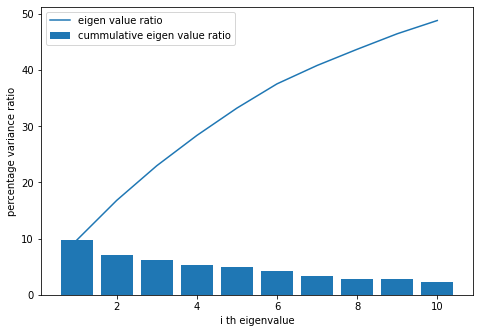

In [12]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(list(range(1,11)),pca_obj.explained_variance_ratio_[:10]*100)
plt.plot(list(range(1,11)),[sum(pca_obj.explained_variance_ratio_[:i+1])*100 for i in range(10)])
plt.ylabel('percentage variance ratio')
plt.xlabel('i th eigenvalue')
plt.legend(['eigen value ratio','cumulative eigen value ratio'])
plt.show()

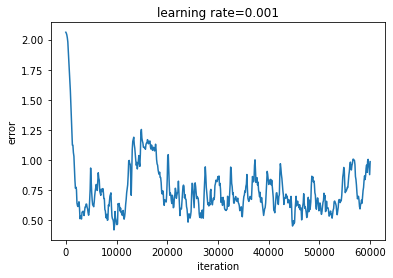

In [7]:
#Oja's method
V = init_V(n_features,num)
error_list=[np.linalg.norm(np.abs(pca)-np.abs(V))]

for i in range(600):
        
    V = oja1(xn[i*100:(i+1)*100,:], V ,0.001)
    error_list.append(np.linalg.norm(np.abs(pca)-np.abs(V)))

plt.plot([i*100 for i in range(601)],error_list)
plt.title('learning rate=0.001')
plt.xlabel('iteration')
plt.ylabel('error')
plt.show()

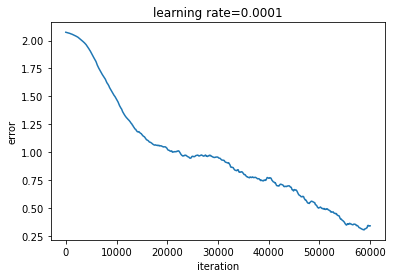

In [8]:
#Oja's method
V = init_V(n_features,num)
error_list=[np.linalg.norm(np.abs(pca)-np.abs(V))]

for i in range(600):
        
    V = oja1(xn[i*100:(i+1)*100,:], V ,0.0001)
    error_list.append(np.linalg.norm(np.abs(pca)-np.abs(V)))
    
plt.plot([i*100 for i in range(601)],error_list)
plt.title('learning rate=0.0001')
plt.xlabel('iteration')
plt.ylabel('error')
plt.show()

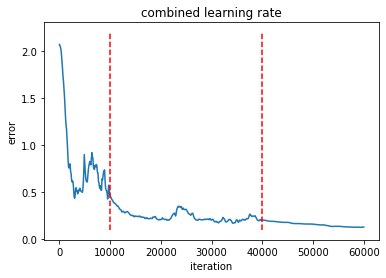

In [9]:
#Oja's method
V = init_V(n_features,num)
error_list=[np.linalg.norm(np.abs(pca)-np.abs(V))]

for i in range(100):
        
    V = oja1(xn[i*100:(i+1)*100,:], V ,0.001)
    error_list.append(np.linalg.norm(np.abs(pca)-np.abs(V)))

for i in range(300):
        
    V = oja1(xn[i*100:(i+1)*100,:], V ,0.0001)
    error_list.append(np.linalg.norm(np.abs(pca)-np.abs(V)))
    
for i in range(200):
        
    V = oja1(xn[i*100:(i+1)*100,:], V ,0.00001)
    error_list.append(np.linalg.norm(np.abs(pca)-np.abs(V)))
    
plt.plot([i*100 for i in range(601)],error_list)
plt.plot([10000,10000],[0.1,2.2],linestyle='--',color='r')
plt.plot([40000,40000],[0.1,2.2],linestyle='--',color='r')
plt.xlabel('iteration')
plt.title('combined learning rate')
plt.ylabel('error')
plt.show()